## 4.3 MLP Autoencoder 

In [1]:
import os
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')
from models.AutoEncoders_usingmlp3.AutoEncoders import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('./data/external/fashion_mnist/fashion-mnist_train.csv')  # Update the path as needed
test_data = pd.read_csv('./data/external/fashion_mnist/fashion-mnist_test.csv')    # Update the path as needed

# Separate features and labels
x_train = train_data.drop(columns=['label']).values.reshape(-1, 28, 28)  # Reshape to (num_samples, 28, 28)
y_train = train_data['label'].values

x_test = test_data.drop(columns=['label']).values.reshape(-1, 28, 28)
y_test = test_data['label'].values

# Normalize the images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 

# Split the training data into train, val, and test sets (70:10:20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

# Check the shapes of the datasets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# Flatten the images (28x28 -> 784)
x_train_flattened = x_train.reshape(-1, 28*28)
x_val_flattened = x_val.reshape(-1, 28*28)
x_test_flattened = x_test.reshape(-1, 28*28)

# Normalize pixel values to the range [0, 1]
x_train_flattened /= 255.0
x_val_flattened /= 255.0
x_test_flattened /= 255.0

# Check the shape of the flattened data
print("Flattened training set shape:", x_train_flattened.shape)
print("Flattened validation set shape:", x_val_flattened.shape)
print("Flattened test set shape:", x_test_flattened.shape)

Training set shape: (42000, 28, 28) (42000,)
Validation set shape: (18000, 28, 28) (18000,)
Test set shape: (10000, 28, 28) (10000,)
Flattened training set shape: (42000, 784)
Flattened validation set shape: (18000, 784)
Flattened test set shape: (10000, 784)


## 1. Train autoencoder MLP on flatenned image

In [2]:
mlp = AutoEncoder(
    input_size=x_train_flattened.shape[1],  # 784, since we flattened the images
    before=[100,70],  # Example of the hidden layers before the latent space
    latent_size=64,   # Latent size
    after=[70,100],    # Example of the hidden layers after the latent space
    output_size=x_train_flattened.shape[1],  # Output should match the input size
    learning_rate=0.001,
    activation='relu',
    optimizer='mini-batch',
    batch_size=10,
    epochs=50
)

# Train the model
mlp.fit(x_train_flattened, x_train_flattened,x_val_flattened)


[784, 100, 70, 64, 70, 100, 784]
Epoch Train 0: Loss = 0.0420
Epoch Train 0: Loss = 0.0417
Epoch Train 10: Loss = 0.0229
Epoch Train 10: Loss = 0.0228
Epoch Train 20: Loss = 0.0206
Epoch Train 20: Loss = 0.0205
Epoch Train 30: Loss = 0.0189
Epoch Train 30: Loss = 0.0188
Epoch Train 40: Loss = 0.0179
Epoch Train 40: Loss = 0.0178


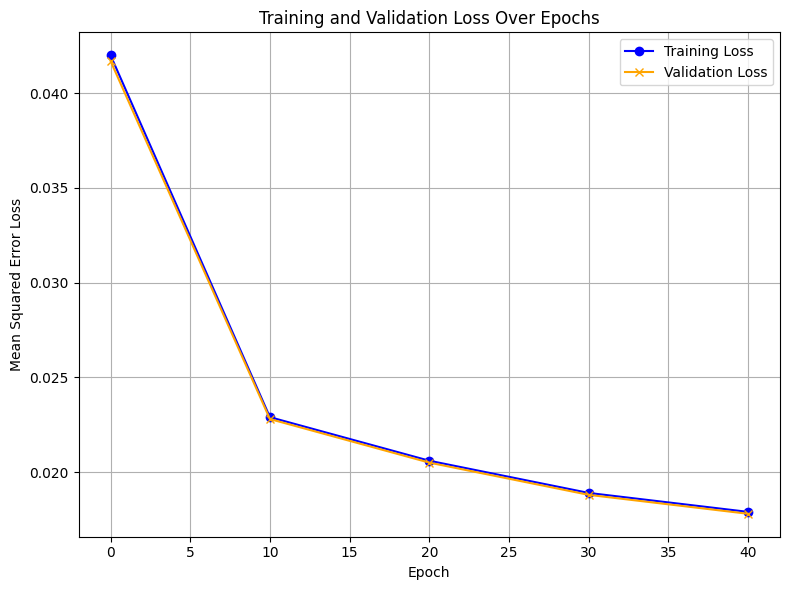

In [7]:
import matplotlib.pyplot as plt

# Provided data: Epoch-wise loss values for train and validation
train_loss = [0.0420, 0.0229, 0.0206, 0.0189,  0.0179]
val_loss = [0.0417,  0.0228, 0.0205,  0.0188,  0.0178]

# Epoch numbers
epochs = [0, 10, 20, 30, 40]

# Plotting the loss curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x', color='orange')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# MLP vs. CNN Autoencoder Performance Comparison

### MLP Autoencoder
- **Training Loss (across Epochs)**: [0.0420, 0.0229, 0.0206, 0.0189, 0.0179]
- **Validation Loss (across Epochs)**: [0.0417, 0.0228, 0.0205, 0.0188, 0.0178]
- **Final Train Loss**: 0.0179
- **Final Validation Loss**: 0.0178
- **Observation**: The MLP autoencoder shows a gradual reduction in loss over 40 epochs, reaching a final loss around 0.017. This indicates that the model requires more epochs to stabilize and yields moderate reconstruction quality without severe overfitting.

### CNN Autoencoder Performance

1. **Combination 1**
   - **Latent Dim**: 64
   - **Learning Rate**: 0.01
   - **Optimizer**: Adam
   - **Filters**: [32, 64]
   - **Final Train Loss**: 0.0122
   - **Final Validation Loss**: 0.0125
   - **Observation**: This model reaches a significantly lower loss than the MLP autoencoder within just a few epochs. The combination of a higher learning rate, Adam optimizer, and convolutional layers helps it capture image features effectively and with fewer training steps.

2. **Combination 2**
   - **Latent Dim**: 32
   - **Learning Rate**: 0.01
   - **Optimizer**: SGD
   - **Filters**: [64, 128]
   - **Final Train Loss**: 0.0476
   - **Final Validation Loss**: 0.0435
   - **Observation**: Although this configuration has a higher final loss, it still converges much faster than the MLP autoencoder. With SGD and a smaller latent dimension, it achieves reasonable results with fewer epochs.

3. **Combination 3**
   - **Latent Dim**: 64
   - **Learning Rate**: 0.001
   - **Optimizer**: Adam
   - **Filters**: [64, 128]
   - **Final Train Loss**: 0.0098
   - **Final Validation Loss**: 0.0097
   - **Observation**: This configuration demonstrates the best performance, achieving the lowest train and validation loss values with minimal difference between them. The model reaches high-quality reconstructions within only a few epochs, thanks to its larger latent dimension, Adam optimizer with a smaller learning rate, and deep convolutional structure.

### Key Points in Comparison

1. **Faster Convergence**: The CNN autoencoders, especially **Combination 3**, achieve low loss values within fewer than five epochs, while the MLP autoencoder requires 40 epochs to reach a higher final loss.
2. **Improved Accuracy with CNN**: The CNN autoencoder achieves better reconstruction quality due to its convolutional layers, which efficiently capture spatial patterns in the images, resulting in significantly lower loss values.
3. **Efficiency of CNN Architectures**: The convolutional filters in CNNs allow better generalization over image data, providing lower loss, faster convergence, and better stability compared to the MLP.

### Summary
The CNN autoencoder, particularly **Combination 3**, demonstrates clear superiority over the MLP autoencoder. It achieves:
- **Lower loss values in less than five epochs**, reflecting a much faster training process.
- **Better reconstruction accuracy** due to the ability of convolutional layers to capture complex spatial features in images.

These factors make CNN autoencoders more effective than MLP autoencoders for image reconstruction tasks.


## 2. Visualization of images

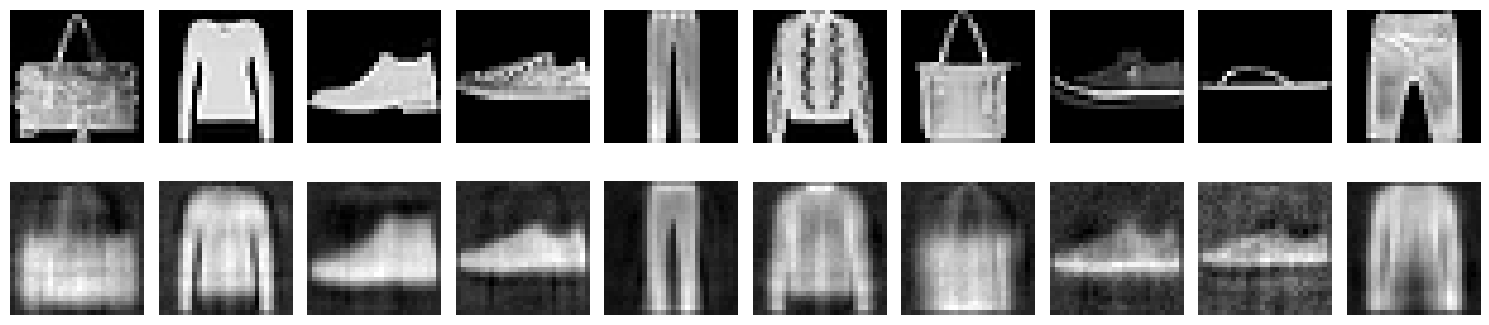

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a simple MLP autoencoder function for reconstruction
def mlp_autoencoder(input_data):
    
    return mlp.predict(input_data)
   

# Select 10 random images from the test set (assumes x_test_flattened is the dataset)
indices = np.random.randint(0, x_test_flattened.shape[0], 10)  # Select 10 random indices
original_images = x_test_flattened[indices]  # Get the selected images (flattened)

# Get the reconstructed images by passing the flattened input through the model
reconstructed_images = mlp_autoencoder(original_images)

# Reshape the reconstructed images back to 28x28 for display
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)

# Plot the original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    # Original image (reshaped back to 28x28 for visualization)
    axes[0, i].imshow(original_images[i].reshape(28, 28), cmap='gray')  # Reshape and plot
    axes[0, i].axis('off')
    
    # Reconstructed image (reshaped back to 28x28 for visualization)
    axes[1, i].imshow(reconstructed_images[i], cmap='gray')  # Reshape and plot
    axes[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


# Reconstruction Quality Comparison: CNN vs. MLP Autoencoder

## CNN Autoencoder Reconstruction (Image 1)

### Overall Quality:
- The reconstructed images maintain **clearer and sharper details**.
- **Edges and contours** are well-preserved.
- Shapes of clothing items are **more distinct and recognizable**.
- Better preservation of **texture and internal details**.

### Specific Observations:
- **Footwear (sneakers, boots)**: Clear sole patterns and lace details.
- **T-shirts and pullovers**: Maintain overall structure and fold patterns.
- **Trousers**: Clear leg separation and fabric texture.
- **Accessories (bags)**: Retain distinctive shapes.

## MLP Autoencoder Reconstruction (Image 2)

### Overall Quality:
- The reconstructions are **blurry and less detailed**.
- **Edges** are softer and less defined.
- Loss of fine details and textures.
- More noticeable **artifacts and distortions**.

### Specific Observations:
- **Footwear**: Loses detailed patterns, appearing more blob-like.
- **Clothing items (shirts, pullovers)**: Show less internal structure.
- **Trousers**: Less distinct leg separation.
- **Bags and accessories**: Lose some characteristic features.

## Key Differences

### 1. Spatial Information Preservation
- **CNN**: Preserves spatial relationships better due to its convolutional layers.
- **MLP**: Loses some spatial context due to flattening the input.

### 2. Detail Retention
- **CNN**: Maintains finer details and textures.
- **MLP**: Produces more smoothed-out, averaged reconstructions.

### 3. Edge Definition
- **CNN**: Produces sharper, more defined edges.
- **MLP**: Reconstructions have softer, more blurred boundaries.

### 4. Overall Fidelity
- **CNN**: Reconstructions are closer to the original images.
- **MLP**: Shows more significant information loss, leading to less accurate reconstructions.

In summary, the **CNN autoencoder** excels in preserving details, edges, and spatial relationships, producing higher-quality reconstructions compared to the **MLP autoencoder**, which suffers from blurring and loss of fine details.


# 4.4 PCA_Autoencoder.ipynb
